In [ ]:
# pip install sklearn

In [1]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [3]:
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [4]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [5]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [6]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [7]:
predictions[0:5]

array([158.43766157,  81.05817185, 119.76632224, 122.31165846,
       165.25447584])

Text(0, 0.5, 'Predictions')

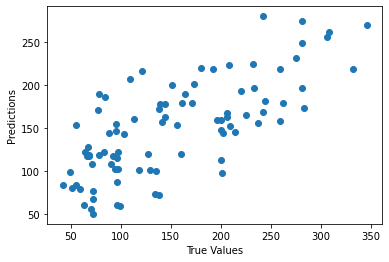

In [8]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [2]:
import numpy as np

In [10]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 53.34334296843826
Train RMSE: 53.62833695031358


# Cross Validation

In [38]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

2

In [12]:
print(kf)

KFold(n_splits=2, random_state=None, shuffle=False)


In [13]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### LOOCV

In [39]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [18]:
# Load the Diabetes dataset
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [19]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


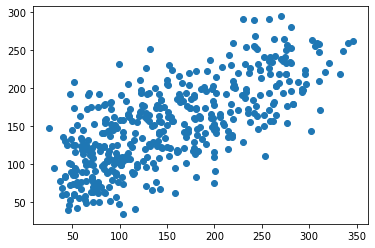

In [20]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

In [21]:
predictions

array([204.74116867,  66.83256782, 175.60492163, 165.82131555,
       128.83457511, 103.05913006,  77.50532134, 125.41897877,
       161.76534891, 209.5903942 ,  98.5866784 , 102.25391983,
       114.3072534 , 161.82165714, 100.50073703, 176.55193264,
       206.59118368, 184.3577636 , 147.82727722, 121.98438237,
       119.6409081 ,  89.72660898, 117.35311756, 251.99153125,
       164.01794205, 146.8714022 ,  95.41577967, 178.88367056,
       127.20395689, 179.54810126, 159.81822573,  67.84440925,
       259.65876453, 105.56967912,  78.43441365,  83.11721913,
       203.10947232, 154.06508322, 240.73979433, 137.18048859,
       158.32510156,  72.81647497, 145.48464826,  78.96090116,
       218.96414895, 125.73533137, 141.31322446, 107.95054173,
        72.54328656, 192.8483576 , 157.23952998, 171.00497069,
       134.05940748, 158.09263799, 139.09864269,  71.7115061 ,
       208.28948411,  77.67427519, 102.08430196, 135.69822265,
       113.420112  , 184.40319269,  61.37326553,  96.75

In [22]:
np.sqrt(mean_squared_error(y,predictions))

54.76342105528678

# Feature Scaling

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
  
# Read Data from CSV 
data = pd.read_csv('regression.csv') 
data.head() 

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [34]:
y = data['Value']

In [35]:
data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

In [36]:
data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

#### MinMaxScaler

In [23]:
# Initialise the Scaler and Fit
norm = MinMaxScaler().fit(X_train)

In [27]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,0.379310,0.395833,0.361702,0.193878
1,0.482759,0.375000,0.340426,0.214286
2,0.344828,0.437500,0.468085,0.255102
3,0.275862,0.583333,0.617021,0.010204
4,0.206897,0.333333,0.446809,0.173469
...,...,...,...,...
14320,0.172414,0.208333,0.340426,0.295918
14321,0.206897,0.375000,0.510638,0.142857
14322,0.275862,0.708333,0.765957,0.091837
14323,0.551724,0.333333,0.297872,0.040816


In [28]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,0.103448,0.437500,0.680851,0.183673
1,0.275862,0.604167,0.638298,0.255102
2,0.310345,0.395833,0.361702,0.234694
3,0.206897,0.770833,0.851064,0.193878
4,0.241379,0.458333,0.531915,0.091837
...,...,...,...,...
3577,0.310345,0.291667,0.319149,0.040816
3578,0.448276,0.458333,0.425532,0.030612
3579,0.103448,0.333333,0.531915,0.183673
3580,0.413793,0.645833,0.617021,0.020408


### Standard Scaler

In [4]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Initialise the Scaler and Fit
norm = StandardScaler().fit(X_train)

In [33]:
pd.DataFrame(columns = X_train.columns, data = norm.transform(X_train))

,Age,Overall,Potential,Jersey Number
0,-1.733988,-1.187189,0.761204,0.464522
1,0.195001,2.709805,2.392917,-0.731317
2,-0.447995,-0.321190,-0.544166,0.779216
3,-0.019331,0.689141,0.434861,-0.542500
4,1.266662,0.256142,-0.544166,-0.920134
...,...,...,...,...
14320,-1.090992,-1.187189,0.108519,0.464522
14321,-1.305324,-0.176857,1.413889,3.863222
14322,0.837998,0.111809,-0.707337,-0.227806
14323,0.195001,1.699473,1.250718,-0.290745


In [34]:
pd.DataFrame(columns = X_test.columns, data = norm.transform(X_test))

,Age,Overall,Potential,Jersey Number
0,-0.233663,-0.465523,-0.707337,-0.605439
1,-0.233663,0.833475,0.924375,-0.731317
2,0.409333,0.111809,-0.380995,-0.920134
3,1.266662,0.111809,-0.707337,0.527461
4,-0.876660,0.544808,1.740232,-0.668378
...,...,...,...,...
3577,-1.305324,-1.620188,-0.217824,1.786239
3578,0.623665,-0.321190,-1.196851,-0.038989
3579,0.623665,-0.032524,-0.870509,-0.668378
3580,-0.019331,-1.187189,-1.849536,-0.668378


# tasks

###### try applying this scalers to any dataset and check the regression results

In [1]:
# shut down your kernel

import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
# Read Data from CSV 
data = pd.read_csv('regression.csv') 

y = data['Value']

data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

data.head()

,Age,Overall,Potential,Jersey Number
0,31,94,94,10.0
1,33,94,94,7.0
2,26,92,93,10.0
3,27,91,93,1.0
4,27,91,92,7.0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(14325, 4)
(3582, 4)


In [4]:
# MinMax scaler

def minmax_scaler(dataset_to_be_normed, train_dataset):
    train_col = list(train_dataset.columns)
    dataset_normed = dataset_to_be_normed.copy()
    
    #assuming these datasets have the same columns
    for i in range(len(train_col)):
        dataset_normed[train_col[i]] = (dataset_to_be_normed[train_col[i]] - min(train_dataset[train_col[i]]))/( max(train_dataset[train_col[i]]) - min(train_dataset[train_col[i]]))
    
    return dataset_normed



# Standard scaler

def standard_scaler(dataset_to_be_normed, train_dataset):
    train_col = list(train_dataset.columns)
    dataset_normed = dataset_to_be_normed.copy()
    
    #assuming these datasets have the same columns
    for i in range(len(train_col)):
        dataset_normed[train_col[i]] = (dataset_to_be_normed[train_col[i]] - np.mean(train_dataset[train_col[i]]))/np.std(train_dataset[train_col[i]])
    
    return dataset_normed

In [5]:
#example (the max and min values of all the columns are 1 and 0 correspondingly - checked)

minmax_scaler(X_train, X_train)

,Age,Overall,Potential,Jersey Number
10457,0.655172,0.395833,0.361702,0.102041
4726,0.344828,0.500000,0.510638,0.132653
12940,0.344828,0.333333,0.319149,0.224490
713,0.551724,0.687500,0.659574,0.173469
16826,0.068966,0.187500,0.531915,0.326531
...,...,...,...,...
2756,0.413793,0.562500,0.531915,0.061224
14827,0.172414,0.291667,0.446809,0.163265
1567,0.172414,0.604167,0.744681,0.020408
11425,0.103448,0.375000,0.702128,0.265306


In [6]:
#example (the mean and std of all the columns are 0 and 1 correspondingly - checked)

standard_scaler(X_test, X_train)

,Age,Overall,Potential,Jersey Number
4780,-0.241648,0.543899,0.766991,-0.603226
6289,-0.241648,0.399719,0.604011,0.339815
10818,0.186663,-0.321182,-1.025791,-0.980443
3330,-0.241648,0.832260,0.929971,-0.791834
15658,-1.312424,-1.186264,0.278050,0.654162
...,...,...,...,...
7549,1.043284,0.111359,-0.699831,-0.540357
16040,-1.312424,-1.330445,0.278050,0.654162
14713,-1.526579,-0.897904,0.278050,3.168939
3517,1.043284,0.832260,0.115070,-0.540357


In [7]:
#example

X_train_normed = standard_scaler(X_train, X_train)

print(np.std(X_train_normed["Jersey Number"]))
print(np.mean(X_train_normed["Jersey Number"]))

1.0000000000000127
-6.032793035729298e-17


In [8]:
# fit a model with original X_train and X_test
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# get the coefficients of this regression
model.coef_

array([-239443.30851292,  536317.59719552,   92887.34934628,
         -1183.47294275])

In [9]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train), y_train)))

Test RMSE: 3726607.649607099
Train RMSE: 4254412.801033359


In [10]:
# fit a model with minmax normed X_train and X_test
X_train_normed = minmax_scaler(X_train, X_train)
X_test_normed = minmax_scaler(X_test, X_train)


lm = linear_model.LinearRegression()
model = lm.fit(X_train_normed, y_train)
predictions = lm.predict(X_test_normed)

# get the coefficients of this regression
model.coef_

array([-6943855.94687463, 25743244.66538501,  4365705.41927535,
        -115980.34838958])

In [11]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train_normed), y_train)))

Test RMSE: 3726607.649607099
Train RMSE: 4254412.801033359


In [12]:
# fit a model with standard normed X_train and X_test
X_train_normed = standard_scaler(X_train, X_train)
X_test_normed = standard_scaler(X_test, X_train)


lm = linear_model.LinearRegression()
model = lm.fit(X_train_normed, y_train)
predictions = lm.predict(X_test_normed)

# get the coefficients of this regression
model.coef_

array([-1118082.88526797,  3719769.78407246,   569930.23573971,
         -18824.30310356])

In [13]:
print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train_normed), y_train)))

Test RMSE: 3726607.649607099
Train RMSE: 4254412.801033359


In [14]:
# as expected we get the same scores for linear regression,
# but the coefficients of regression are different depending on the scaler used

In [80]:
# One Hot Encoding

In [14]:
data = pd.read_csv('regression.csv')

In [15]:
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Position,Jersey Number,Contract Valid Until,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,RF,10.0,2021,5'7,159lbs
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,ST,7.0,2022,6'2,183lbs
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,LW,10.0,2022,5'9,150lbs
3,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,GK,1.0,2020,6'4,168lbs
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,RCM,7.0,2023,5'11,154lbs


In [16]:
pd.get_dummies(data[['Age', 'Club']])

,Age,Club_ SSV Jahn Regensburg,Club_1. FC Heidenheim 1846,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Union Berlin,Club_1. FSV Mainz 05,Club_AC Ajaccio,...,Club_Wycombe Wanderers,Club_Yeni Malatyaspor,Club_Yeovil Town,Club_Yokohama F. Marinos,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Çaykur Rizespor,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17902,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17903,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17904,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17905,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# tasks

###### try applying this scalers ??? to any column(s) and check the regression results

In [17]:
data = pd.read_csv('regression.csv')
# your code here

# first I make a linear regression on only numerical columns (as an example I take )
y = data['Value']

data = data.drop(['Name', 'Nationality', 'Club', 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [18]:
# fit a model with minmax normed X_train and X_test
X_train_normed = minmax_scaler(X_train, X_train)
X_test_normed = minmax_scaler(X_test, X_train)


lm = linear_model.LinearRegression()
model = lm.fit(X_train_normed, y_train)
predictions = lm.predict(X_test_normed)

print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train_normed), y_train)))

Test RMSE: 4194089.9645577236
Train RMSE: 4143931.756081394


In [19]:
# fit a model with minmax normed X_train and X_test
X_train_normed = standard_scaler(X_train, X_train)
X_test_normed = standard_scaler(X_test, X_train)


lm = linear_model.LinearRegression()
model = lm.fit(X_train_normed, y_train)
predictions = lm.predict(X_test_normed)

print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train_normed), y_train)))

Test RMSE: 4194089.9645577236
Train RMSE: 4143931.756081394


In [20]:
# now I use onehotencoding technic just for the club and position info

data = pd.read_csv('regression.csv')

y = data['Value']
x1 = pd.get_dummies(data[[ 'Club', 'Position']])

# data['Wage'] = data['Wage'].map(lambda x: x.lstrip('€').rstrip('K'))
# data['Weight'] = data['Weight'].map(lambda x: x.rstrip('lbs'))
x2 = data.drop(['Age', 'Name', 'Nationality', "Club", 'Wage', 'Position', 'Weight', 'Height', 'Contract Valid Until', 'Value'], axis = 1)

X = pd.concat([x1, x2], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
X_train_normed = minmax_scaler(X_train, X_train)
X_test_normed = minmax_scaler(X_test, X_train)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_normed, y_train)
predictions = lm.predict(X_test_normed)

print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train_normed), y_train)))

Test RMSE: 3525836.4322750317
Train RMSE: 3498272.4516059626


In [22]:
X_train_normed = standard_scaler(X_train, X_train)
X_test_normed = standard_scaler(X_test, X_train)

lm = linear_model.LinearRegression()
model = lm.fit(X_train_normed, y_train)
predictions = lm.predict(X_test_normed)

print ('Test RMSE:', np.sqrt(mean_squared_error(predictions, y_test)))
print ('Train RMSE:', np.sqrt(mean_squared_error(lm.predict(X_train_normed), y_train)))

Test RMSE: 3526452.529664089
Train RMSE: 3500073.9115489605


In [ ]:
# so just adding club and position info we've slightly improved the rmse scores 
# adding more features from nationality, height, wage, etc. will improve this a lot also, although not so simple preprocessing is needed